In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [23]:
data=pd.read_csv(r"..\Notebooks\Consumption_dataset.csv")
data.head()

,Timestamp,Value,year,Date,Month,Temperature,Holiday,Is_Working_Day
0,2013-03-21 00:00:00+00:00,51953.816584,2013,2013-03-21,3,13.0,Working Day,1
1,2013-03-22 00:00:00+00:00,42459.352626,2013,2013-03-22,3,15.0,Working Day,1
2,2013-03-23 00:00:00+00:00,34399.993680,2013,2013-03-23,3,15.0,Working Day,1
3,2013-03-24 00:00:00+00:00,35669.267336,2013,2013-03-24,3,14.8,Working Day,1
4,2013-03-25 00:00:00+00:00,52242.277642,2013,2013-03-25,3,19.0,Working Day,1


Understanding Dataset

In [24]:
print("Rows :",data.shape[0])
print("\nColumns :",data.shape[1])
print("\nFeatures :\n",data.columns.to_list())
print("\nMissing Values :\n",data.isna().sum())
print("\n Duplicates Count :",data.duplicated().sum())

Rows : 1446

Columns : 8

Features :
 ['Timestamp', 'Value', 'year', 'Date', 'Month', 'Temperature', 'Holiday', 'Is_Working_Day']

Missing Values :
 Timestamp         0
Value             5
year              0
Date              0
Month             0
Temperature       0
Holiday           0
Is_Working_Day    0
dtype: int64

 Duplicates Count : 0


In [25]:
# Converting Date and timestamp to datetime format
data['Date']=pd.to_datetime(data['Date'])
data['Timestamp']=pd.to_datetime(data['Timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Timestamp       1446 non-null   datetime64[ns, UTC]
 1   Value           1441 non-null   float64            
 2   year            1446 non-null   int64              
 3   Date            1446 non-null   datetime64[ns]     
 4   Month           1446 non-null   int64              
 5   Temperature     1446 non-null   float64            
 6   Holiday         1446 non-null   object             
 7   Is_Working_Day  1446 non-null   int64              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 90.5+ KB


Finding Null values

In [26]:
data.query('Value!=Value')
##0r
# data[data['Value'].isnull()]

,Timestamp,Value,year,Date,Month,Temperature,Holiday,Is_Working_Day
1092,2016-03-17 00:00:00+00:00,NaN,2016,2016-03-17,3,12.5,Working Day,1
1093,2016-03-18 00:00:00+00:00,NaN,2016,2016-03-18,3,15.0,Working Day,1
1094,2016-03-19 00:00:00+00:00,NaN,2016,2016-03-19,3,22.0,Working Day,1
1289,2016-09-30 00:00:00+00:00,NaN,2016,2016-09-30,9,11.0,Working Day,1
1292,2016-10-03 00:00:00+00:00,NaN,2016,2016-10-03,10,10.0,Working Day,1


In [27]:
fig = px.line(data, x='Date', y='Value', title="Energy Consumption Distribution")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step="year", stepmode="backward"),
            dict(count=2, label='2y', step="year", stepmode="backward"),
            dict(count=3, label='3y', step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(
    width=1200, 
    height=600  
)

fig.show()


In [28]:
## Seting my index as date

data=data.set_index("Timestamp")
data_na=data.copy()
data_na=data_na.dropna()  ## Drop value because of  auto-correlation plot


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

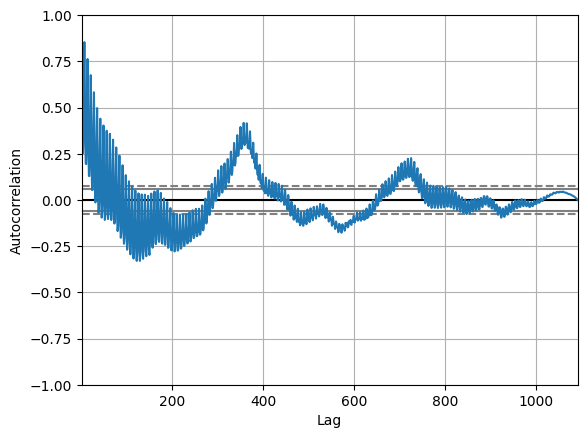

In [30]:
pd.plotting.autocorrelation_plot(data_na.loc['2014':'2016', 'Value']) # Ploting autocorrelation graph

C:\Users\melbi\AppData\Local\Temp\ipykernel_18332\2889694248.py:1: FutureWarning:

'm' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='Lag', ylabel='Autocorrelation'>

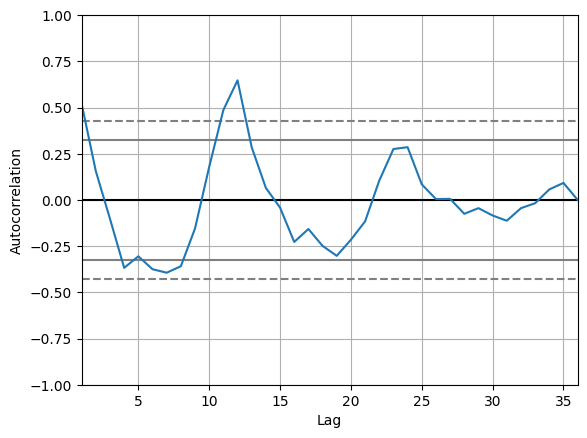

In [31]:
pd.plotting.autocorrelation_plot(data_na.loc['2014':'2016', 'Value'].resample('1m').mean()) # Plotting auto-correlation graph for each month

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

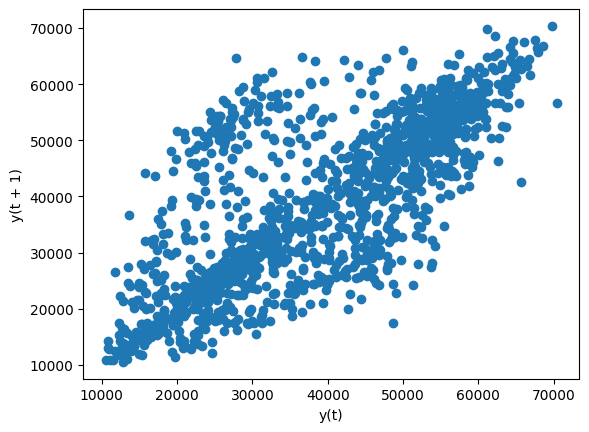

In [32]:
pd.plotting.lag_plot(data['Value'],lag=1)   # identify any correlation or relationship between a time series and a lagged version of itself

lag=1: This means that the plot will compare each value in the Value column to the value at the previous time step (i.e., lag 1)

Pattern/Linearity: If the points in the lag plot are clustered around a diagonal line, this suggests a strong autocorrelation at the given lag (lag 1 in this case).
Random Distribution: If the points are scattered without any clear pattern, it suggests that the data does not have a strong autocorrelation for that lag.

<Axes: xlabel='y(t)', ylabel='y(t + 3)'>

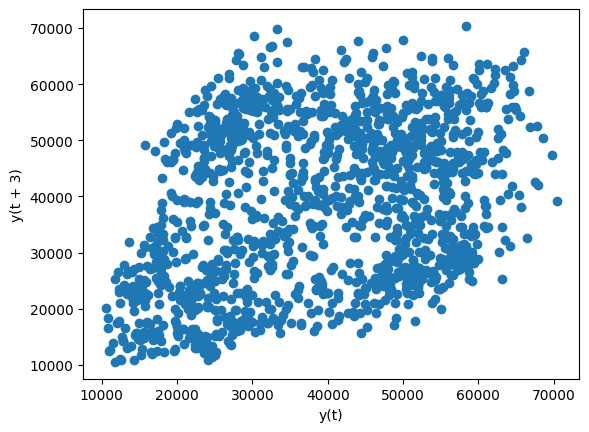

In [33]:
pd.plotting.lag_plot(data['Value'],lag=3)       #energy consumption on a given day with the energy consumption three days prior.

#Lag 3: This means the plot will show each day's energy consumption (Value) on the x-axis and the energy consumption three days earlier on the y-axis.

In [43]:
data_new = data.loc[(data['year'] == 2016) & (data['Month']==3)]
data_new

,Value,year,Date,Month,Temperature,Holiday,Is_Working_Day
Timestamp,,,,,,,
2016-03-01 00:00:00+00:00,47788.906927,2016,2016-03-01,3,13.00,Working Day,1
2016-03-02 00:00:00+00:00,46121.368004,2016,2016-03-02,3,12.20,Working Day,1
2016-03-03 00:00:00+00:00,44129.591652,2016,2016-03-03,3,14.50,Working Day,1
2016-03-04 00:00:00+00:00,34958.690097,2016,2016-03-04,3,17.00,Working Day,1
2016-03-05 00:00:00+00:00,20953.028208,2016,2016-03-05,3,17.00,Working Day,1
2016-03-06 00:00:00+00:00,22371.482582,2016,2016-03-06,3,17.50,Working Day,1
2016-03-07 00:00:00+00:00,46039.689873,2016,2016-03-07,3,16.00,Working Day,1
2016-03-08 00:00:00+00:00,50020.317466,2016,2016-03-08,3,15.00,Working Day,1
2016-03-09 00:00:00+00:00,43635.472711,2016,2016-03-09,3,15.00,Working Day,1


In [48]:
# create a shifted version of your data by one year
data_shifted = data.copy()
data_shifted['Date'] = data_shifted['Date'] + pd.DateOffset(years=1)

data_new = data_new.merge(data_shifted[['Date', 'Value']], on='Date', how='left', suffixes=('', '_prev'))

if 'Value_prev_prev' in data_new.columns:
    data_new['Value_prev'] = data_new['Value_prev_prev']
    data_new.drop(columns=['Value_prev_prev'], inplace=True)
data_new 

,Value,year,Date,Month,Temperature,Holiday,Is_Working_Day,Value_prev
0,47788.906927,2016,2016-03-01,3,13.00,Working Day,1,22448.660541
1,46121.368004,2016,2016-03-02,3,12.20,Working Day,1,39561.916556
2,44129.591652,2016,2016-03-03,3,14.50,Working Day,1,46758.592431
3,34958.690097,2016,2016-03-04,3,17.00,Working Day,1,43552.669536
4,20953.028208,2016,2016-03-05,3,17.00,Working Day,1,44479.255056
5,22371.482582,2016,2016-03-06,3,17.50,Working Day,1,35206.199585
6,46039.689873,2016,2016-03-07,3,16.00,Working Day,1,18668.740643
7,50020.317466,2016,2016-03-08,3,15.00,Working Day,1,15733.278115
8,43635.472711,2016,2016-03-09,3,15.00,Working Day,1,44217.345016
9,45244.959408,2016,2016-03-10,3,18.50,Working Day,1,46146.343962
